In [1]:
import torch
import torch.nn as nn
import numpy as np


In [2]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)


In [4]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim,1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [7]:
model = LogisticRegression(1)

In [5]:
learning_rate = 0.01
n_iters = 100

In [9]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)


In [21]:
for epoch in range(n_iters):
    y_pred = model(X)

    loss = criterion(y_pred,y)
    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if (epoch + 1)% 10 == 0:
        print(f'epoch: {epoch}', f'loss: {loss.item()}')



epoch: 9 loss: 0.6964654326438904
epoch: 19 loss: 0.6964408755302429
epoch: 29 loss: 0.696416437625885
epoch: 39 loss: 0.6963922381401062
epoch: 49 loss: 0.6963680982589722
epoch: 59 loss: 0.696344256401062
epoch: 69 loss: 0.696320652961731
epoch: 79 loss: 0.6962970495223999
epoch: 89 loss: 0.696273684501648
epoch: 99 loss: 0.6962504982948303


In [22]:
with torch.no_grad():
    y_prob = model(X)
    y_pred = y_prob.round()
    print("Xác suất:", y_prob.squeeze())
    print("Dự đoán:", y_pred.squeeze())


Xác suất: tensor([0.4367, 0.4692, 0.5019, 0.5347])
Dự đoán: tensor([0., 0., 1., 1.])


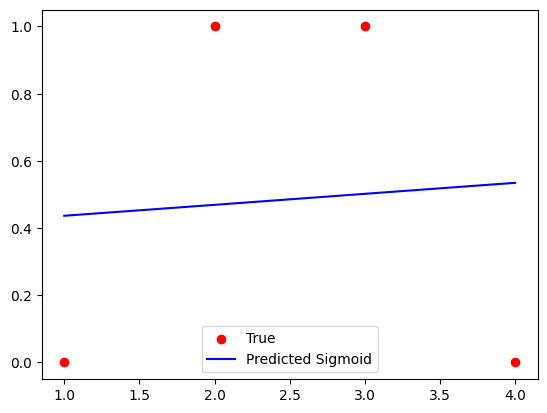

In [23]:
import matplotlib.pyplot as plt

with torch.no_grad():
    x_range = torch.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = model(x_range)

plt.scatter(X.numpy(), y.numpy(), color='red', label='True')
plt.plot(x_range.numpy(), y_range.numpy(), color='blue', label='Predicted Sigmoid')
plt.legend()
plt.show()
